# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [11]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
!pip install bokeh==2.0.1
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached pip-23.3.2-py3-none-any.whl.metadata (3.5 kB)
Using cached pip-23.3.2-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.3.1
    Uninstalling pip-23.3.1:
      Successfully uninstalled pip-23.3.1
  Using cached setuptools-69.0.3-py3-none-any.whl.metadata (6.3 kB)
Using cached setuptools-69.0.3-py3-none-any.whl (819 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 69.0.2
    Uninstalling setuptools-69.0.2:
      Successfully uninstalled setuptools-69.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.3.3 requires pyqt5<5.16, which is not installed.
spyder 5.3.3 requires pyqtwebengine<5.16, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.26.2 which is incompatible.
panel 0.13.1 requires bokeh<2.5.0,>=2.4.0, but you have bokeh

### Setup Kaggle API Key

In [ ]:
# create the .kaggle directory and an empty kaggle.json file
!pip install kaggle
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "emugabi"
kaggle_key = "ee1a6cf3573f5567148a77d75a7421c5"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms

In [5]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [13]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [7]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv", parse_dates=["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.

In [9]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv", parse_dates=["datetime"])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [10]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [11]:
train = train.drop(columns=['casual', 'registered'], errors='ignore')
predictor = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(train, time_limit=600, presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20240126_152716"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240126_152716/ds_sub_fit/sub_fit_ho.
2024-01-26 15:27:17,524	INFO util.py:159 -- Outdated packages:
  ipywidgets==7.6.5 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
Beginning Aut

### Review AutoGluon's training run with ranking of models that did the best.

In [12]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3  -53.048395  root_mean_squared_error       2.695165  393.879359                0.000624           0.506245            3       True         10
1  RandomForestMSE_BAG_L2  -53.372777  root_mean_squared_error       2.647328  321.431455                0.661222          30.461801            2       True          8
2         CatBoost_BAG_L2  -55.276875  root_mean_squared_error       2.033319  362.911314                0.047213          71.941659            2       True          9
3   KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.070713    0.099577                0.070713           0.099577            1       True          2
4     WeightedEnsemble_L2  -84.125061  root_mean_squared_error       0.071552    0.491583         

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -130.508827011041,
  'ExtraTreesMSE_BAG_L1': -124.60067564699747,
  'NeuralNetFastAI_BAG_L1': -138.11831823050682,
  'WeightedEnsemble_L2': -84.12506123181602,
  'RandomForestMSE_BAG_L2': -53.372777143988245,
  'CatBoost_BAG_L2': -55.27687465967661,

### Create predictions from test dataset

In [13]:
# test.drop(columns=['casual', 'registered'])
predictions = predictor.predict(test)
predictions.head()

0    23.655527
1    42.190868
2    45.532658
3    49.520725
4    52.962734
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [14]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.996460
std        90.130180
min         2.765408
25%        20.471333
50%        64.698074
75%       166.607712
max       364.332275
Name: count, dtype: float64

In [15]:
# How many negative values do we have?
print(predictions[predictions < 0])

Series([], Name: count, dtype: float32)


In [16]:
# Set them to zero
predictions[predictions < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [17]:
submission["count"] = predictions
print(submission["count"])
submission.to_csv("submission.csv", index=False)

0        23.655527
1        42.190868
2        45.532658
3        49.520725
4        52.962734
           ...    
6488    156.366241
6489    156.417038
6490    156.830444
6491    151.146713
6492    149.581787
Name: count, Length: 6493, dtype: float32


In [18]:
# !kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [19]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                        date                 description                                            status    publicScore  privateScore  
------------------------------  -------------------  -----------------------------------------------------  --------  -----------  ------------  
submission_hpo3.csv             2024-01-26 13:32:05  hyperparameters v3 - added num_bag_* parameters        complete  0.50393      0.50393       
submission_submission_hpo2.csv  2024-01-26 13:22:45  hyperparameters v2 - with correct filename             complete  0.50382      0.50382       
submission_new_features.csv     2024-01-26 13:17:35  hyperparameters v2                                     complete  0.73774      0.73774       
submission_new_hpo.csv          2024-01-26 05:26:35  new features with hyperparameters                      complete  0.50556      0.50556       


#### Initial score of `1.79553`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>],
       [<AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'count'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

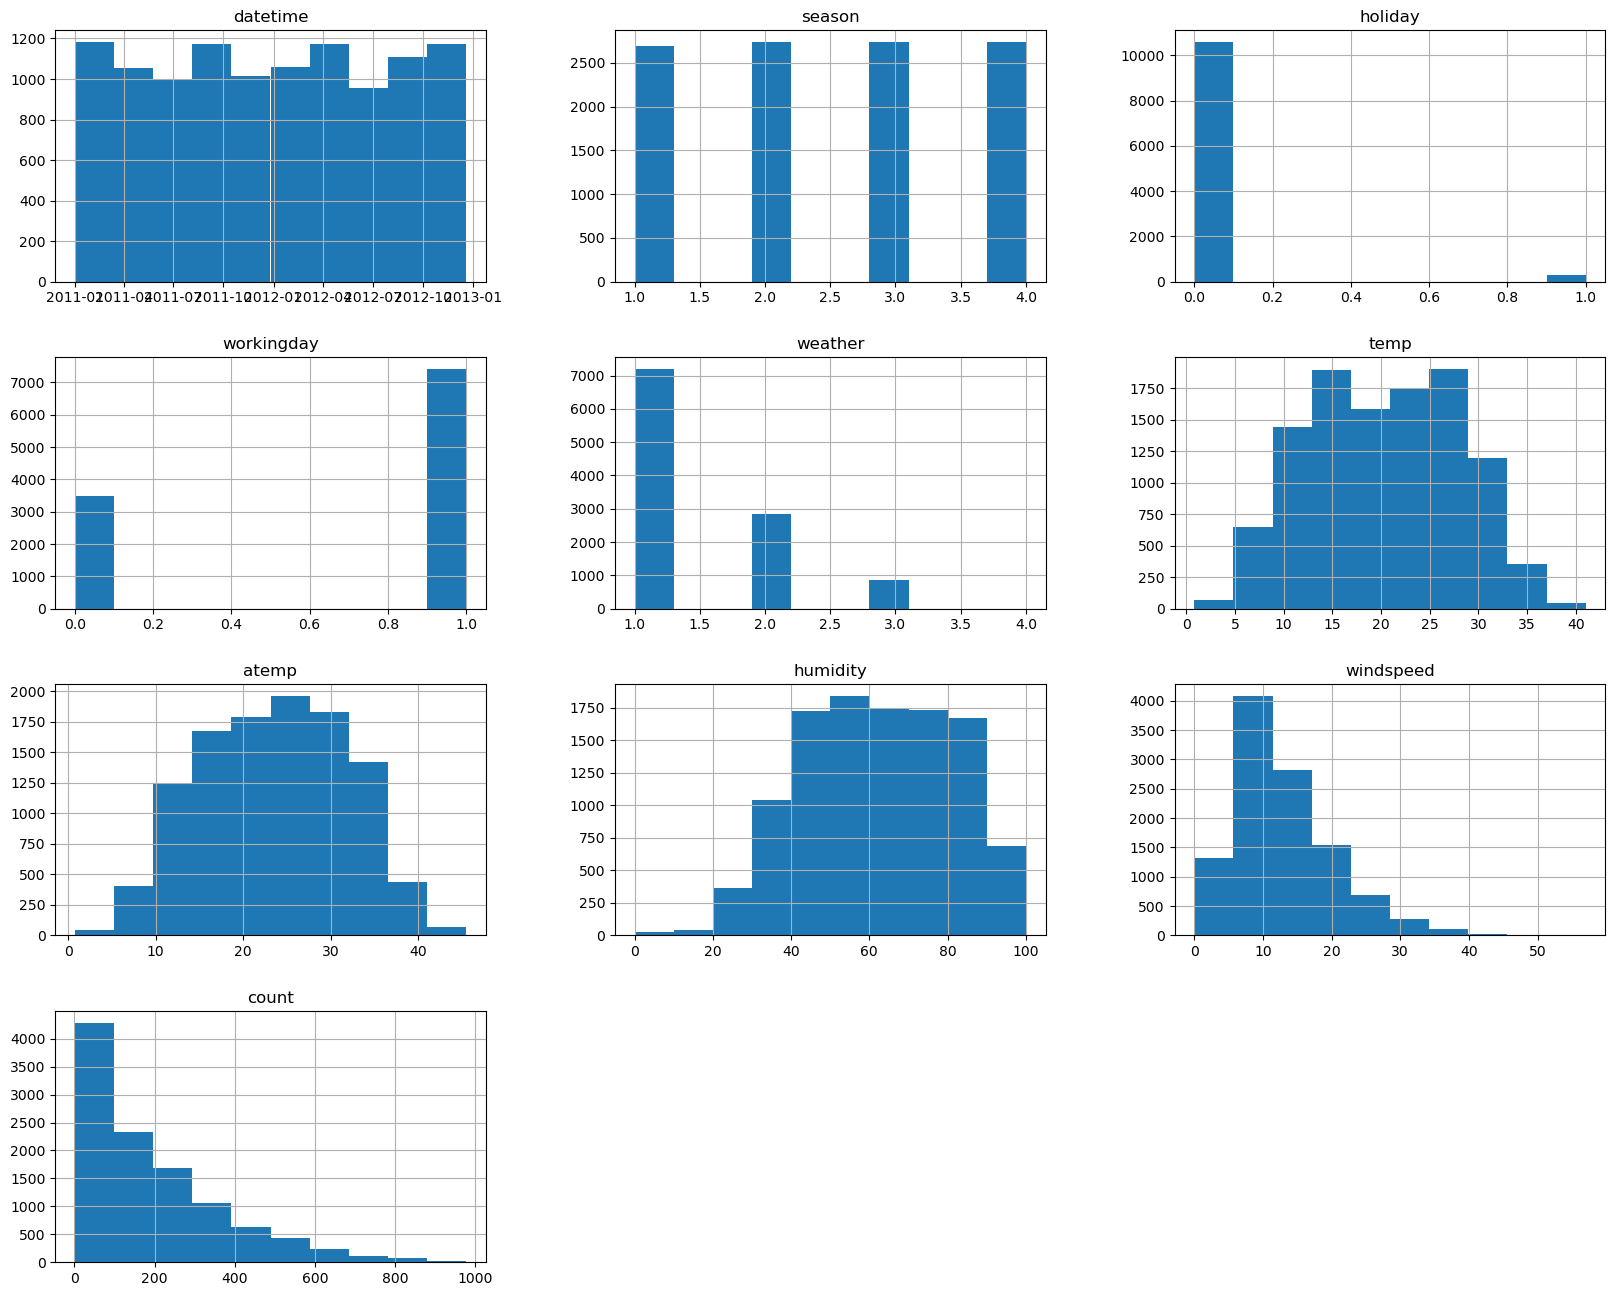

In [20]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(20, 16))

In [21]:
# create a new feature
# Split out into hour, day and month
train['hour'] = train['datetime'].dt.hour
train['date'] = train['datetime'].dt.date
train['month'] = train['datetime'].dt.month

train.head()

test['hour'] = test['datetime'].dt.hour
test['date'] = test['datetime'].dt.date
test['month'] = test['datetime'].dt.month

test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,date,month
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,2011-01-20,1
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,2011-01-20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2,2011-01-20,1
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,2011-01-20,1
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4,2011-01-20,1


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [22]:
train["season"] = train['season'].astype('category')
train["weather"] = train['weather'].astype('category')

print(train.dtypes)

test["season"] = test['season'].astype('category')
test["weather"] = test['weather'].astype('category')

print(test.dtypes)

datetime      datetime64[ns]
season              category
holiday                int64
workingday             int64
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
count                  int64
hour                   int32
date                  object
month                  int32
dtype: object
datetime      datetime64[ns]
season              category
holiday                int64
workingday             int64
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
hour                   int32
date                  object
month                  int32
dtype: object


In [23]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,date,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,0,2011-01-01,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1,2011-01-01,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2,2011-01-01,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,3,2011-01-01,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,4,2011-01-01,1


array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>],
       [<AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'count'}>,
        <AxesSubplot:title={'center':'hour'}>],
       [<AxesSubplot:title={'center':'month'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

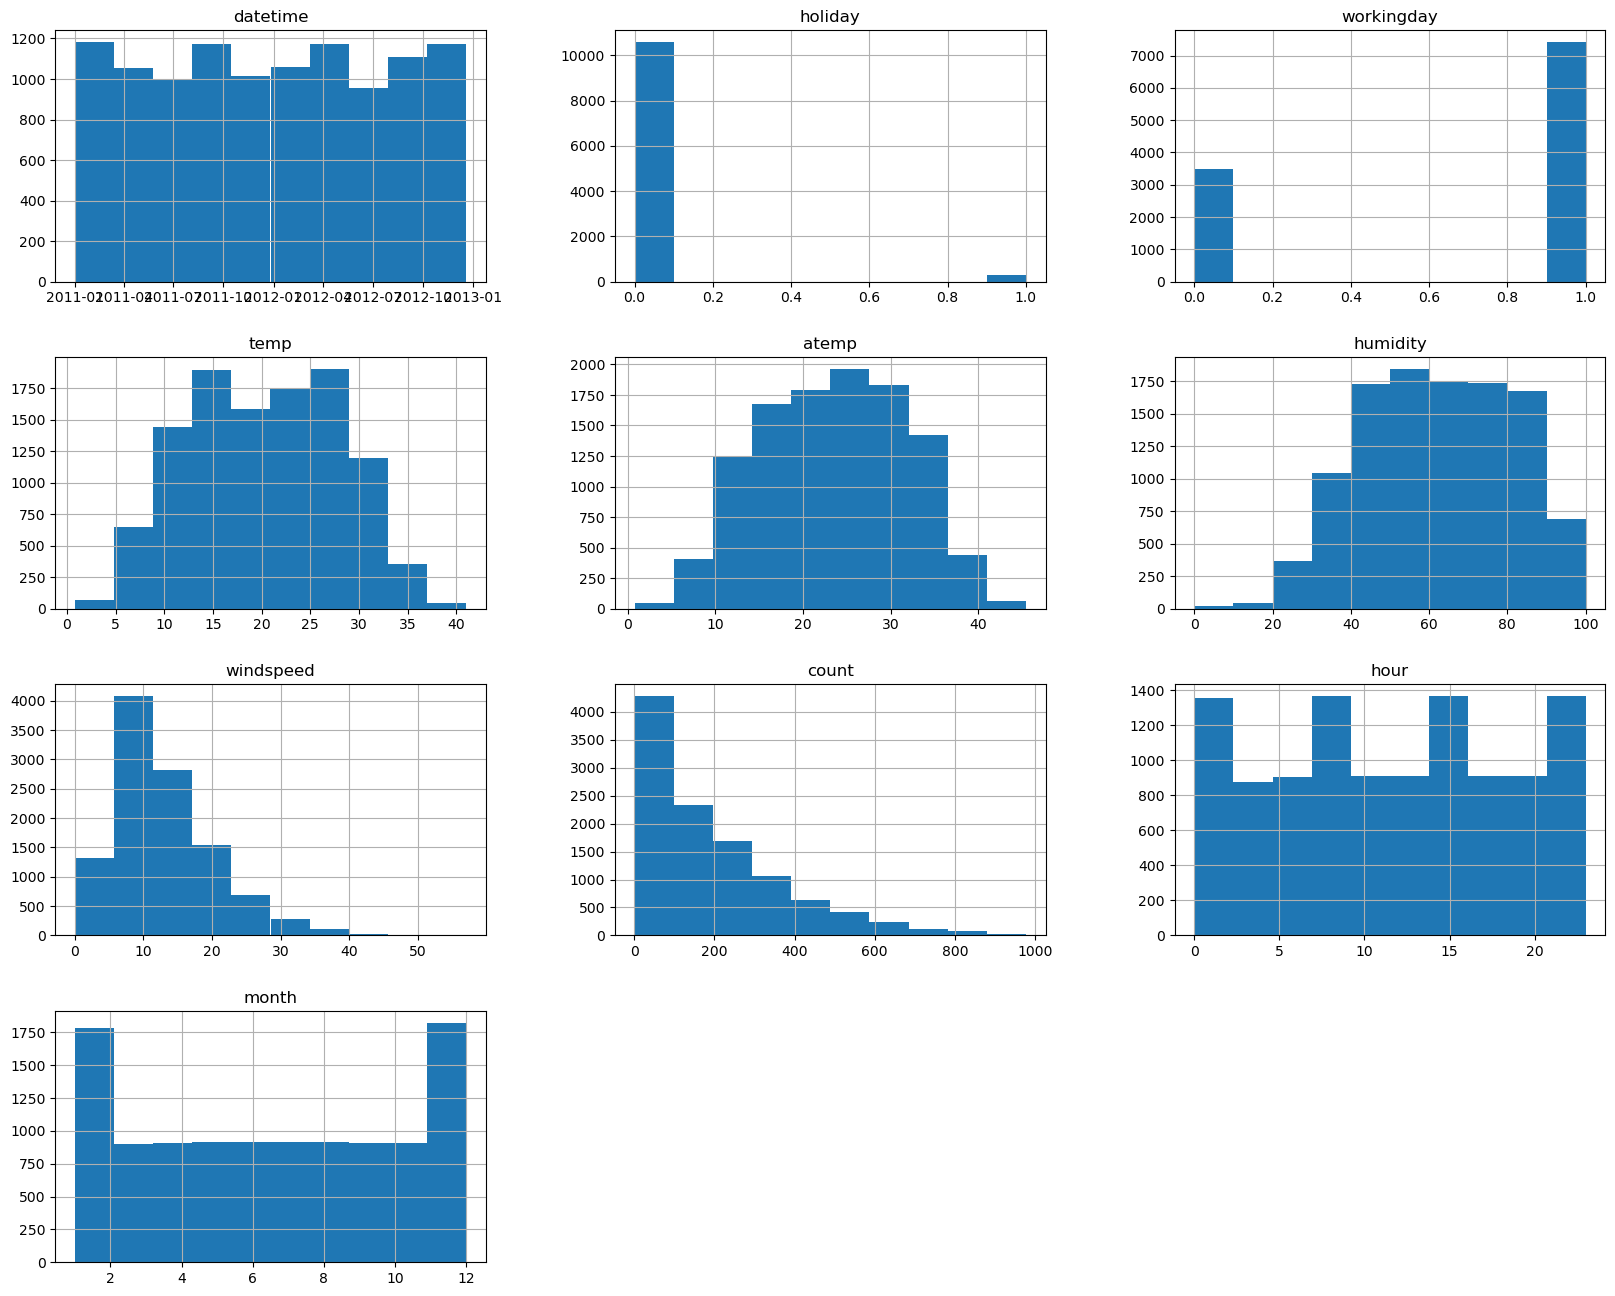

In [24]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(20, 16))

In [25]:
# Additional EDA 

# 1. Check Correlation between atemp and temp

correlation_coefficient = train['atemp'].corr(train['temp'])
print(correlation_coefficient)

print(train.columns)
# Drop datetime columns to allow computation of Correlation Matrix
train_without_date = train.drop(columns=["datetime", "date"])
train_without_date.corr()



0.9849481104817066
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'count', 'hour', 'date', 'month'],
      dtype='object')


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,month
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.163439,-0.006546,0.971524
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,-0.005393,-0.000354,0.001731
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,0.011594,0.002780,-0.003394
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.128655,-0.022740,0.012144
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.394454,0.145430,0.257589
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.389784,0.140343,0.264173
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.317371,-0.278011,0.204537
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.101369,0.146631,-0.150192
count,0.163439,-0.005393,0.011594,-0.128655,0.394454,0.389784,-0.317371,0.101369,1.000000,0.400601,0.166862
hour,-0.006546,-0.000354,0.002780,-0.022740,0.145430,0.140343,-0.278011,0.146631,0.400601,1.000000,-0.006818


In [ ]:
# Given the correlation, drop the following columns from the dataset

columns_to_drop = ['casual', 'registered', 'season', 'temp', 'holiday', 'workingday']


## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:


train = train.drop(columns=columns_to_drop, errors='ignore')
predictor_new_features = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(train, time_limit=600, presets='best_quality')



In [ ]:
predictor_new_features.fit_summary()

In [ ]:
predictor_new_features.leaderboard()

In [ ]:
# Remember to set all negative values to zero
test1 = test.drop(columns=columns_to_drop, errors='ignore')

predictions2 = predictor_new_features.predict(test1)

predictions2.head()

#predictions2.describe()

In [ ]:
# Same submitting predictions
submission_new_features = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])
submission_new_features.head()

#print(submission_new_features)
submission_new_features["count"] = predictions2
submission_new_features.to_csv("submission_new_features_with_dropped_columns.csv", index=False)

In [ ]:
#!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "submission_new_features_with_dropped_columns"

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

#### New Score of `0.71915`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:
predictor_new_hpo = TabularPredictor(
    label='count', 
    problem_type='regression',
    eval_metric='root_mean_squared_error'
                                    
).fit(
    train, 
    time_limit=600, 
    hyperparameters={'RF': {'n_estimators': 200, 'max_depth': 100}}, 
    hyperparameter_tune_kwargs={'num_trials': 60,'searcher': 'auto','scheduler':'local'},
    presets='best_quality',
)


In [ ]:
predictor_new_hpo.fit_summary()
#
#

In [ ]:
# Remember to set all negative values to zero
# ?

test3 = test.drop(columns=columns_to_drop, errors='ignore')

predictions3 = predictor_new_hpo.predict(test3)

predictions3.head()

predictions3.describe()

In [ ]:
submission_new_hpo = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])
submission_new_hpo.head()

# Same submitting predictions
submission_new_hpo["count"] = predictions3
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [ ]:
#!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 10

#### New Score of `0.50556`

### Hyperparameter 2

In [ ]:
# Hyperparameter #2

# Introduce Day Of The Week 

train_X = pd.read_csv("train.csv", parse_dates=["datetime"])

train_X['day_of_week'] = train_X['datetime'].dt.dayofweek
train_X['hour'] = train_X['datetime'].dt.hour
train_X['date'] = train_X['datetime'].dt.date
train_X['month'] = train_X['datetime'].dt.month

train_X["season"] = train_X['season'].astype('category')
train_X["weather"] = train_X['weather'].astype('category')


predictor_new_hpo2 = TabularPredictor(
    label='count', 
    problem_type='regression',
    eval_metric='root_mean_squared_error'
                                    
).fit(
    train_X.drop(columns=columns_to_drop, errors='ignore'), 
    time_limit=600, 
    hyperparameters={'RF': {}}, 
    hyperparameter_tune_kwargs={'num_trials': 20,'searcher': 'random','scheduler':'local'},
    presets='best_quality',
)

predictor_new_hpo2.fit_summary()
test['day_of_week'] = test['datetime'].dt.dayofweek
predictions_hpo2 = predictor_new_hpo2.predict(test.drop(columns=columns_to_drop, errors='ignore'))

predictions_hpo2.head()

predictions_hpo2.describe()




In [ ]:
#predictions and submit to Kaggle
submission_hpo2 = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])

submission_new_features["count"] = predictions_hpo2
submission_new_features.to_csv("submission_submission_hpo2.csv", index=False)

In [ ]:
#!kaggle competitions submit -c bike-sharing-demand -f submission_submission_hpo2.csv -m "hyperparameters v2 - with correct filename"

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 10

### Hyperparameter #3

In [ ]:
# Hyperparameter #3

# Introduce Day Of The Week 

train_X3 = pd.read_csv("train.csv", parse_dates=["datetime"])

train_X3['day_of_week'] = train_X3['datetime'].dt.dayofweek
train_X3['hour'] = train_X3['datetime'].dt.hour
train_X3['date'] = train_X3['datetime'].dt.date
train_X3['month'] = train_X3['datetime'].dt.month

train_X3["season"] = train_X3['season'].astype('category')
train_X3["weather"] = train_X3['weather'].astype('category')


predictor_new_hpo3 = TabularPredictor(
    label='count', 
    problem_type='regression',
    eval_metric='root_mean_squared_error'
                                    
).fit(
    train_X3.drop(columns=columns_to_drop, errors='ignore'), 
    num_bag_folds=5, 
    num_bag_sets=1, 
    num_stack_levels=1,
    time_limit=600, 
    hyperparameters={'RF': {}}, 
    hyperparameter_tune_kwargs={'num_trials': 20,'searcher': 'random','scheduler':'local'},
    presets='best_quality',
)


predictor_new_hpo3.fit_summary()
test['day_of_week'] = test['datetime'].dt.dayofweek

predictions_hpo3 = predictor_new_hpo3.predict(test.drop(columns=columns_to_drop, errors='ignore'))

predictions_hpo3.head()

#predictions and submit to Kaggle
submission_hpo3 = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])

submission_hpo3["count"] = predictions_hpo3
submission_hpo3.to_csv("submission_hpo3.csv", index=False)

#!kaggle competitions submit -c bike-sharing-demand -f submission_hpo3.csv -m "hyperparameters v3 - added num_bag_* parameters"

!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 10

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 10

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo1", "hpo2", "hpo3"],
        "score": [-52.729375, -31.841558, -41.725934, -41.660190, -41.558487]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

In [ ]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo1", "hpo2", "hpo3"],
        "score": [1.79553, 0.73774, 0.50556, 0.50382, 0.50393 ]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result
# -41.660190
pd.DataFrame({
    "model": ["initial", "add_features", "hpo1", "hpo2", "hpo3"],
    "num_trials": ["-", "-", 60, 20, 20],
    "searcher": ["-", "-", "local", "local","local"],
    "scheduler": ["-", "-", "auto", "random","random"],
    "score": [1.79553, 0.73774, 0.50556, 0.50382, 0.50393]
})

### Extra Refinement to improve results


1) Add more than one feature to the dataset and train models to see if it improves Kaggle score!

The project suggests separating hour from datetime to have additional feature, but others may include:
- Feature that categorizes morning, lunch, and evening rush hour, 7-9am, 11am-1pm, and 5-6pm.
- Feature that categorizes hot/cold/mild temps from temp.
- Feature that categories very windy/mild wind.
- Feature that categories very humid/ not humid.
- Perform multiple rounds of hyperparameter tuning to see if it improves Kaggle score!

2) Test individual algorithm types (KNN, Neural Nets, RF, XGBoost, etc) and write a detailed analysis of which one performs better on this dataset.

3) Create more than the required visualizations for the report. Some suggestions are:

Plot model training performance with more than just the top model.
Plot correlation matrix of all features. Heatmap or scatter plot.
Time series of bike sharing demand.

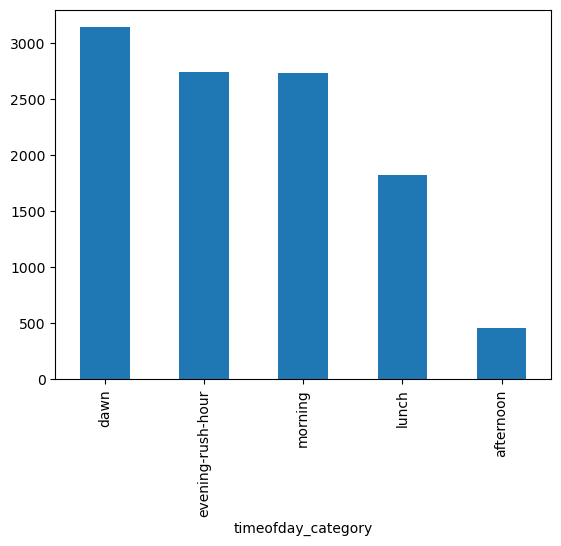

In [4]:
#Option #1 - Including breaking up time into categories
import pandas as pd
#from autogluon.tabular import TabularPredictor

train_X4 = pd.read_csv("train.csv", parse_dates=["datetime"])
train_X4.head()
# morning, lunch, and evening rush hour, 7-9am, 11am-1pm, and 5-6pm.
train_X4['timeofday_category'] = pd.cut(
    train_X4['datetime'].dt.hour, 
    bins=[0, 7, 9, 11, 13, 17, 18, 24], 
    labels=['dawn', 'morning', 'morning', 'morning', 'lunch', 'afternoon', 'evening-rush-hour'], 
    ordered=False,
    right=False
)

#train_X4.head()

train_X4['timeofday_category'].value_counts().plot(kind='bar')

train_X4['day_of_week'] = train_X4['datetime'].dt.dayofweek
train_X4['hour'] = train_X4['datetime'].dt.hour
train_X4['date'] = train_X4['datetime'].dt.date
train_X4['month'] = train_X4['datetime'].dt.month

train_X4["season"] = train_X4['season'].astype('category')
train_X4["weather"] = train_X4['weather'].astype('category')

train_X4['timeofday_category'].value_counts().plot(kind='bar')
train_X4 = pd.get_dummies(train_X4, columns=['timeofday_category'], prefix='timeofday')

### Adding feature #2 for temperature blocks

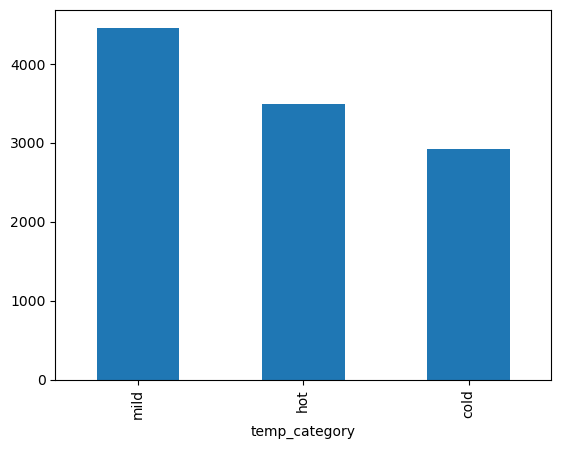

In [5]:
train_X4['temp_category'] = pd.cut(
    train_X4['temp'], 
    bins=[0, 14, 25, 100], 
    labels=['cold', 'mild', 'hot'], 
    right=False
)

train_X4['temp_category'].value_counts().plot(kind='bar')
train_X4 = pd.get_dummies(train_X4, columns=['temp_category'], prefix='temp')

### Adding feature #3 for windspeed blocks

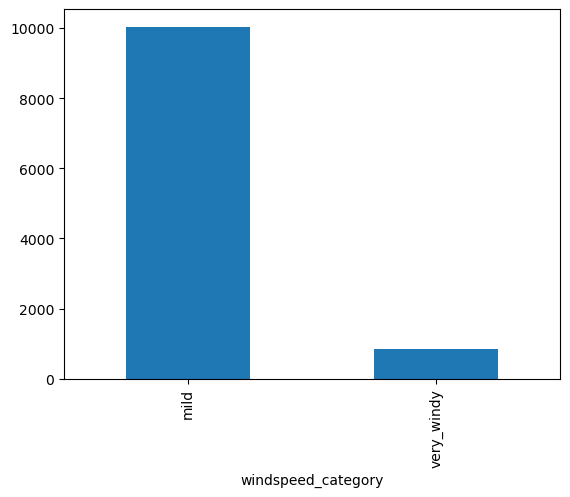

In [6]:
train_X4['windspeed_category'] = pd.cut(
    train_X4['windspeed'], 
    bins=[0, 25, 100], 
    labels=['mild', 'very_windy'], 
    right=False
)

train_X4['windspeed_category'].value_counts().plot(kind='bar')
train_X4 = pd.get_dummies(train_X4, columns=['windspeed_category'], prefix='windspeed')

### Adding feature #4 for humidity

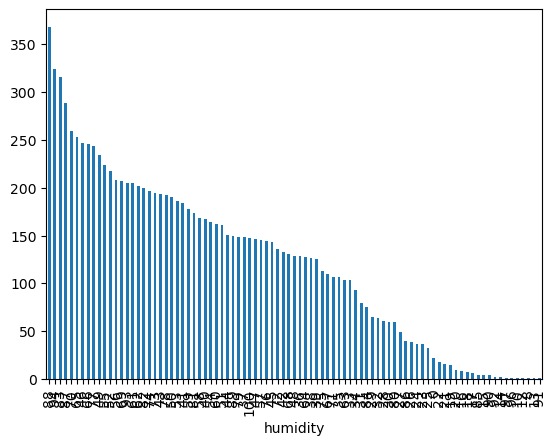

In [7]:
train_X4['humidity_category'] = pd.cut(
    train_X4['humidity'], 
    bins=[0, 40, 120], 
    labels=['not_humid', 'very_humid'], 
    right=False
)

train_X4['humidity'].value_counts().plot(kind='bar')
train_X4 = pd.get_dummies(train_X4, columns=['humidity_category'], prefix='humidity')


In [8]:
train_X4b = train_X4.drop(columns=['datetime', 'date'])
print(train_X4b.columns)
train_X4b.corr()

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'day_of_week',
       'hour', 'month', 'timeofday_afternoon', 'timeofday_dawn',
       'timeofday_evening-rush-hour', 'timeofday_lunch', 'timeofday_morning',
       'temp_cold', 'temp_mild', 'temp_hot', 'windspeed_mild',
       'windspeed_very_windy', 'humidity_not_humid', 'humidity_very_humid'],
      dtype='object')


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,timeofday_evening-rush-hour,timeofday_lunch,timeofday_morning,temp_cold,temp_mild,temp_hot,windspeed_mild,windspeed_very_windy,humidity_not_humid,humidity_very_humid
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,...,-0.003433,-0.002659,-0.002005,-0.257376,0.099319,0.139738,0.110221,-0.110221,-0.170508,0.170508
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,...,-0.000209,-0.000162,-0.000027,0.014189,-0.034167,0.022513,-0.017983,0.017983,-0.009718,0.009718
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,...,0.001421,0.001100,0.000696,-0.014775,0.014000,-0.000717,-0.004364,0.004364,-0.009550,0.009550
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,...,-0.028673,-0.007456,0.035865,-0.023970,0.099895,-0.082450,0.016347,-0.016347,-0.189725,0.189725
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,...,0.026835,0.162873,-0.027088,-0.758493,-0.070955,0.794792,0.054201,-0.054201,0.082575,-0.082575
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,...,0.028176,0.156140,-0.027631,-0.773294,-0.028776,0.764422,0.076310,-0.076310,0.057055,-0.057055
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,...,-0.046519,-0.306074,0.030678,-0.051261,0.120126,-0.077848,0.199151,-0.199151,-0.618541,0.618541
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,...,0.009199,0.162065,0.012553,0.001221,0.042584,-0.046007,-0.624149,0.624149,0.226684,-0.226684
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,...,-0.004434,0.353990,0.043145,-0.337332,-0.061244,0.384741,-0.036948,0.036948,0.266943,-0.266943
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,...,0.143196,0.109858,0.171263,-0.243177,-0.002827,0.233834,-0.029725,0.029725,0.168053,-0.168053


### Re-train model with new parameters

In [14]:
predictor_X4 = TabularPredictor(
    label='count', 
    problem_type='regression',
    eval_metric='root_mean_squared_error'
                                    
).fit(
    train_X4,
    time_limit=600, 
    hyperparameters={'RF': {}}, 
    hyperparameter_tune_kwargs={'num_trials': 20,'searcher': 'random','scheduler':'local'},
    presets='best_quality',
)

predictor_X4.fit_summary()


No path specified. Models will be saved in: "AutogluonModels/ag-20240127_105635"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240127_105635/ds_sub_fit/sub_fit_ho.
2024-01-27 10:56:36,044	INFO util.py:159 -- Outdated packages:
  ipywidgets==7.6.5 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
Beginning Aut

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L3  -2.811366  root_mean_squared_error       0.001142  44.204152                0.000762           0.208471            3       True          4
1  RandomForest_BAG_L1  -2.869040  root_mean_squared_error       0.000180  20.644748                0.000180          20.644748            1       True          1
2  WeightedEnsemble_L2  -2.869040  root_mean_squared_error       0.000841  20.649102                0.000661           0.004354            2       True          2
3  RandomForest_BAG_L2  -2.926379  root_mean_squared_error       0.000380  43.995681                0.000200          23.350932            2       True          3
Number of models trained: 4
Types of models trained:
{'StackerEnsembleModel_RF', 'WeightedEnsembleModel'}
Bagging used: Tru

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


NameError: name 'test' is not defined

In [15]:
test_X4 = pd.read_csv("test.csv", parse_dates=["datetime"])
test_X4.head()

test_X4['timeofday_category'] = pd.cut(
    test_X4['datetime'].dt.hour, 
    bins=[0, 7, 9, 11, 13, 17, 18, 24], 
    labels=['dawn', 'morning', 'morning', 'morning', 'lunch', 'afternoon', 'evening-rush-hour'], 
    ordered=False,
    right=False
)

#train_X4.head()

test_X4['timeofday_category'].value_counts().plot(kind='bar')

test_X4['day_of_week'] = test_X4['datetime'].dt.dayofweek
test_X4['hour'] = test_X4['datetime'].dt.hour
test_X4['date'] = test_X4['datetime'].dt.date
test_X4['month'] = test_X4['datetime'].dt.month

test_X4["season"] = test_X4['season'].astype('category')
test_X4["weather"] = test_X4['weather'].astype('category')

test_X4['timeofday_category'].value_counts().plot(kind='bar')
test_X4 = pd.get_dummies(test_X4, columns=['timeofday_category'], prefix='timeofday')


predictions_X4 = predictor_X4.predict(test_X4)

KeyError: "18 required columns are missing from the provided dataset to transform using AutoMLPipelineFeatureGenerator. 18 missing columns: ['casual', 'registered', 'day_of_week', 'hour', 'date', 'month', 'timeofday_afternoon', 'timeofday_dawn', 'timeofday_evening-rush-hour', 'timeofday_lunch', 'timeofday_morning', 'temp_cold', 'temp_mild', 'temp_hot', 'windspeed_mild', 'windspeed_very_windy', 'humidity_not_humid', 'humidity_very_humid'] | 9 available columns: ['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']"

In [ ]:
def processFeatures(df):
    df['timeofday_category'] = pd.cut(
        df['datetime'].dt.hour, 
        bins=[0, 7, 9, 11, 13, 17, 18, 24], 
        labels=['dawn', 'morning', 'morning', 'morning', 'lunch', 'afternoon', 'evening-rush-hour'], 
        ordered=False,
        right=False
    )

    #train_X4.head()

    df['timeofday_category'].value_counts().plot(kind='bar')

    df['day_of_week'] = df['datetime'].dt.dayofweek
    df['hour'] = df['datetime'].dt.hour
    df['date'] = df['datetime'].dt.date
    df['month'] = df['datetime'].dt.month

    df["season"] = df['season'].astype('category')
    df["weather"] = df['weather'].astype('category')

    df['timeofday_category'].value_counts().plot(kind='bar')
    df = pd.get_dummies(train_X4, columns=['timeofday_category'], prefix='timeofday')
    
    df['temp_category'] = pd.cut(
        df['temp'], 
        bins=[0, 14, 25, 100], 
        labels=['cold', 'mild', 'hot'], 
        right=False
    )

    df['temp_category'].value_counts().plot(kind='bar')
    df = pd.get_dummies(df, columns=['temp_category'], prefix='temp')